In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
n_comp = 11 # la dimension de nos variables EXPLOITABLES

# import de l'échantillon
df = pd.read_csv("data/timesData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [2]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2362 entries, 1 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2362 non-null   object 
 1   university_name         2362 non-null   object 
 2   country                 2362 non-null   object 
 3   teaching                2362 non-null   float64
 4   international           2362 non-null   object 
 5   research                2362 non-null   float64
 6   citations               2362 non-null   float64
 7   income                  2362 non-null   object 
 8   total_score             2362 non-null   object 
 9   num_students            2362 non-null   object 
 10  student_staff_ratio     2362 non-null   float64
 11  international_students  2362 non-null   object 
 12  female_male_ratio       2362 non-null   object 
 13  year                    2362 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [3]:
#-------------------------------------------------------------------------------
#
# Nettoyage des données: remplacer les pays mal orthographié (2 de trouvé)
# remplacer les '-' par des Nan
#
#-------------------------------------------------------------------------------

# pays:
df.country = df['country'].replace(['Unisted States of America', 'Unted Kingdom', 'Austria'],
                                   ['United States of America','United Kingdom', 'Australia'])
print(df.country.unique())

['United States of America' 'United Kingdom' 'Switzerland' 'Hong Kong'
 'South Korea' 'Canada' 'Singapore' 'Australia' 'France' 'Sweden'
 'Germany' 'China' 'Republic of Ireland' 'Finland' 'Taiwan' 'South Africa'
 'Japan' 'Netherlands' 'Belgium' 'Denmark' 'Norway' 'Spain' 'New Zealand'
 'Egypt' 'Turkey' 'Israel' 'Brazil' 'Italy' 'Russian Federation' 'Greece'
 'Iceland' 'Czech Republic' 'India' 'Poland' 'Iran' 'Portugal' 'Thailand'
 'Estonia' 'Saudi Arabia' 'Mexico' 'Colombia' 'Chile' 'Macau' 'Morocco'
 'Luxembourg' 'Cyprus' 'Uganda' 'Malaysia' 'Lebanon' 'Romania' 'Pakistan'
 'Hungary' 'United Arab Emirates' 'Belarus' 'Serbia' 'Slovakia'
 'Bangladesh' 'Ghana' 'Nigeria' 'Indonesia' 'Jordan' 'Latvia' 'Slovenia'
 'Kenya' 'Argentina' 'Qatar' 'Oman' 'Ukraine' 'Lithuania']


In [4]:
# world_rank
df.world_rank = [each.replace('=','') for each in df.world_rank]
# income
df.income = [each.replace('-','') for each in df.income]
df.income = pd.to_numeric(df.income, errors='coerce')
# total_score
df.total_score = [each.replace('-','') for each in df.total_score]
df.total_score = pd.to_numeric(df.total_score, errors='coerce')
# international
df.international = [str(each).replace('%','') for each in df.international]
df.international = pd.to_numeric(df.international, errors='coerce')
# Le champ num_students
df.num_students = [str(each).replace(',', '') for each in df.num_students]
df.num_students  = [str(each).replace('nan', '') for each in df.num_students]
df.num_students = pd.to_numeric(df.num_students, errors='coerce')
# Le champ international_students
df.international_students = [str(each).replace('%','') for each in df.international_students]
df.rename(columns = {"international_students":'international_students_%'})
df.international_students = pd.to_numeric(df.international_students, errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2362 entries, 1 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2362 non-null   object 
 1   university_name         2362 non-null   object 
 2   country                 2362 non-null   object 
 3   teaching                2362 non-null   float64
 4   international           2356 non-null   float64
 5   research                2362 non-null   float64
 6   citations               2362 non-null   float64
 7   income                  2178 non-null   float64
 8   total_score             1077 non-null   float64
 9   num_students            2362 non-null   int64  
 10  student_staff_ratio     2362 non-null   float64
 11  international_students  2362 non-null   int64  
 12  female_male_ratio       2362 non-null   object 
 13  year                    2362 non-null   int64  
dtypes: float64(7), int64(3), object(4)
memor

In [6]:
df.world_rank = pd.to_numeric(df.world_rank, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2362 entries, 1 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              1077 non-null   float64
 1   university_name         2362 non-null   object 
 2   country                 2362 non-null   object 
 3   teaching                2362 non-null   float64
 4   international           2356 non-null   float64
 5   research                2362 non-null   float64
 6   citations               2362 non-null   float64
 7   income                  2178 non-null   float64
 8   total_score             1077 non-null   float64
 9   num_students            2362 non-null   int64  
 10  student_staff_ratio     2362 non-null   float64
 11  international_students  2362 non-null   int64  
 12  female_male_ratio       2362 non-null   object 
 13  year                    2362 non-null   int64  
dtypes: float64(8), int64(3), object(3)
memor

In [7]:
df.to_csv("data/timesData_clean.csv")

In [8]:
data = df[df.year == 2016].iloc[:50,:]
data['female_male_ratio'] = [str(each).split() for each in data.female_male_ratio]
data.female_male_ratio = [(float(each[0]) / float(each[2])) for each in data.female_male_ratio] 
data

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1.0,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243,6.9,27,0.492537,2016
1804,2.0,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919,11.6,34,0.851852,2016
1805,3.0,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596,7.8,22,0.724138,2016
1806,4.0,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812,11.8,34,0.851852,2016
1807,5.0,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074,9.0,33,0.587302,2016
1809,7.0,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929,8.4,27,0.818182,2016
1810,8.0,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,89.1,15060,11.7,51,0.587302,2016
1811,9.0,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,88.3,18178,14.7,37,0.449275,2016
1812,10.0,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,87.9,14221,6.9,21,0.724138,2016
1813,11.0,Johns Hopkins University,United States of America,77.6,70.0,90.4,98.2,100.0,87.6,15128,3.6,23,1.000000,2016


In [9]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["world_rank","teaching","international","research","citations","income","total_score","num_students","student_staff_ratio","international_students","female_male_ratio"]]
X = data_pca.values

In [10]:
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data.university_name.index # ou data.index pour avoir les intitulés
features = data_pca.columns
print(features)

Index(['world_rank', 'teaching', 'international', 'research', 'citations',
       'income', 'total_score', 'num_students', 'student_staff_ratio',
       'international_students', 'female_male_ratio'],
      dtype='object')


In [11]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [12]:
# Calcul des composantes principales
pca = decomposition.PCA(svd_solver='full', n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=11, svd_solver='full')

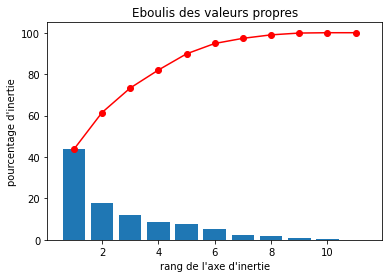

In [13]:
# Eboulis des valeurs propres
display_scree_plot(pca)

### La cassure (méthode du coude) semble être pour 2 composantes principales n_comp = 2 mais le pourcentage cumulé 60% n'est pas assez élevé => 3 composantes principales semble être le bon choix n_comp = 3

In [14]:
features

Index(['world_rank', 'teaching', 'international', 'research', 'citations',
       'income', 'total_score', 'num_students', 'student_staff_ratio',
       'international_students', 'female_male_ratio'],
      dtype='object')

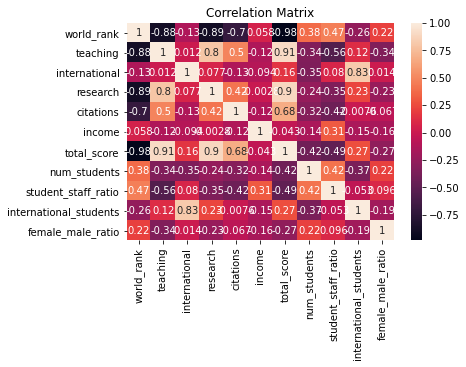

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt

# Matrice de corrélation
corrMatrix = data_pca.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

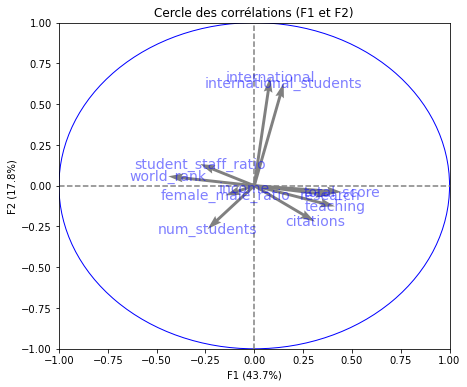

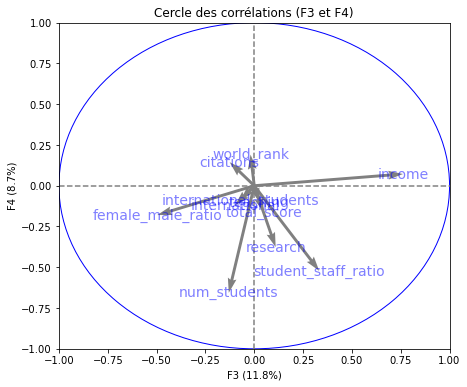

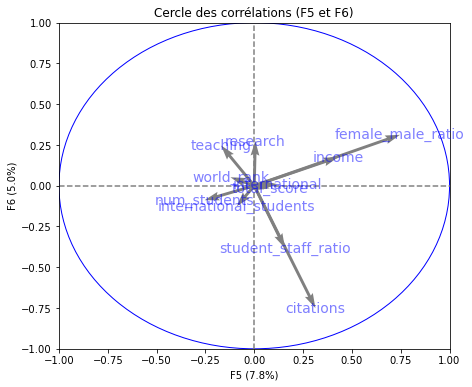

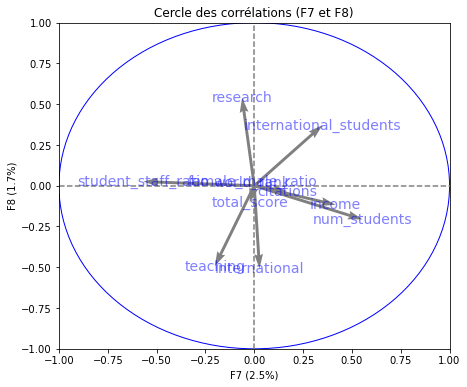

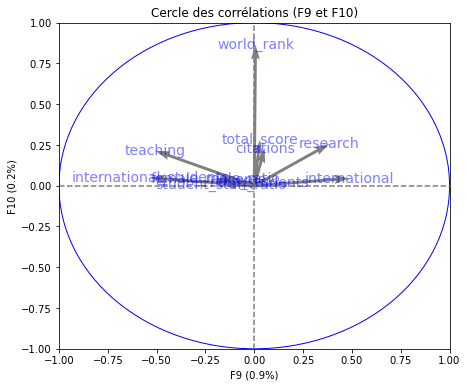

In [16]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5),(6,7),(8,9)], labels = np.array(features))

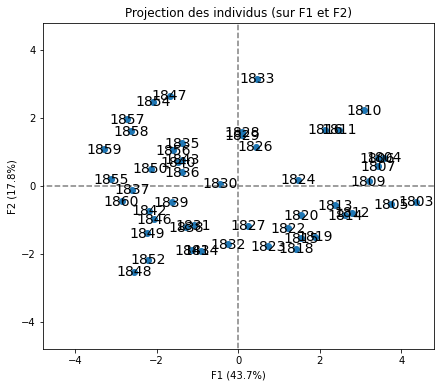

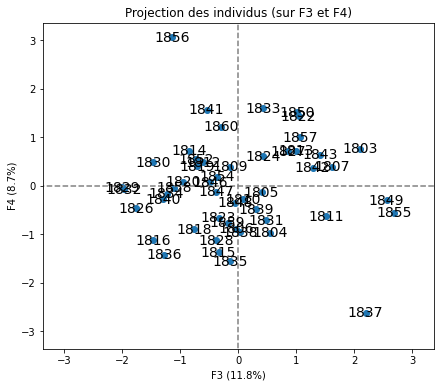

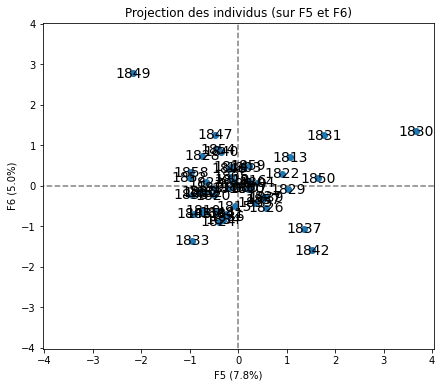

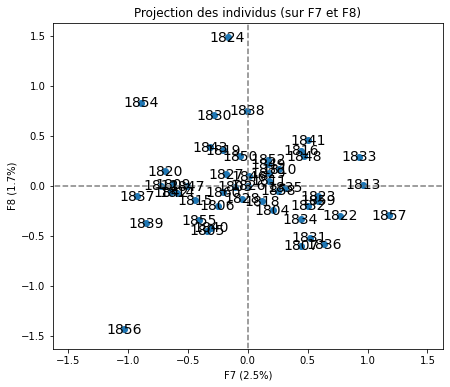

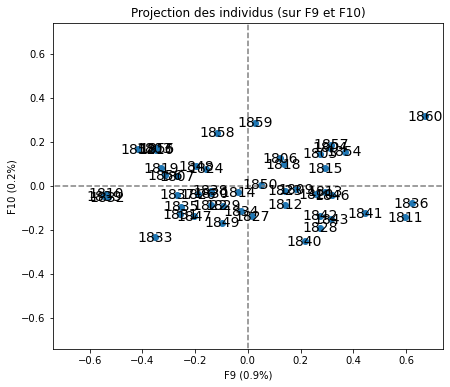

In [17]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5),(6,7),(8,9)], labels = np.array(names))
plt.show()

In [18]:
# Only THREE components
n_comp = 3

In [19]:
# Calcul des composantes principales
pca = decomposition.PCA(svd_solver='full', n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=3, svd_solver='full')

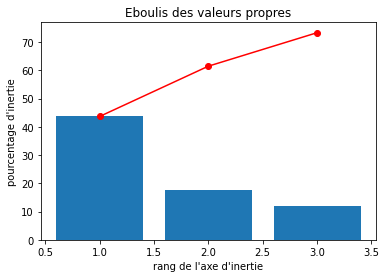

In [20]:
# Eboulis des valeurs propres
display_scree_plot(pca)

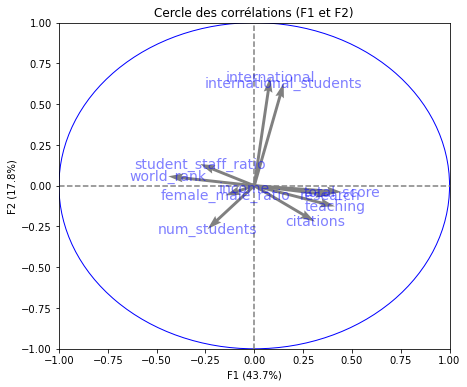

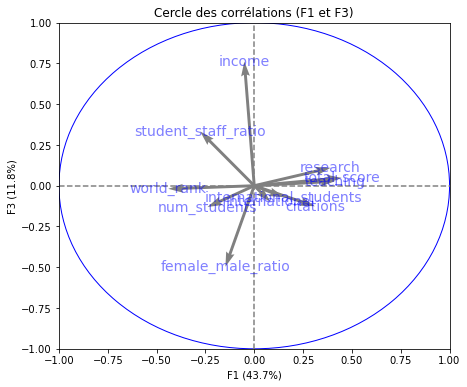

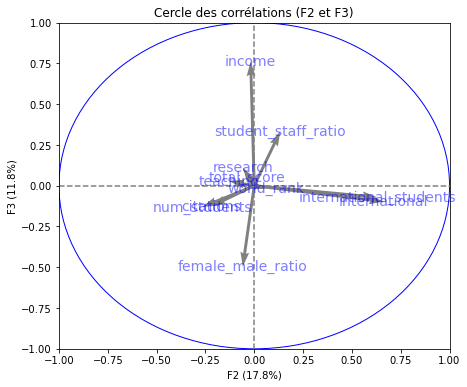

In [23]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(0,2),(1,2)], labels = np.array(features))

### PC1 bien corrélée avec research, teaching, citations & total_score
### PC2 bien corrélée avec international & international_students

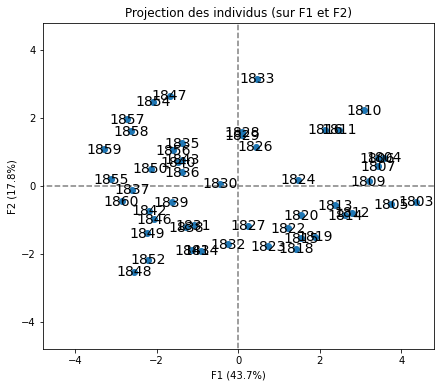

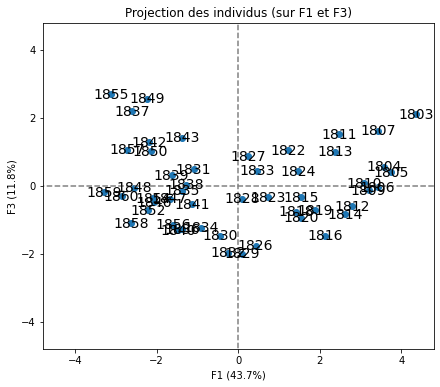

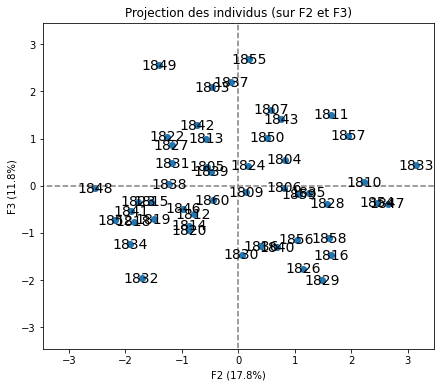

In [24]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(0,2),(1,2)], labels = np.array(names))
plt.show()